In [1]:
# Cameron Schultz 
# ckschult@usc.edu
# Github: ckschultz

In [78]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import scipy
from scipy.stats import bootstrap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import statsmodels
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from tabulate import tabulate
from sklearn.naive_bayes import MultinomialNB, GaussianNB




import sys
# !{sys.executable} -m pip -u statsmodels
# from tabulate import tabulate
import statsmodels.discrete.discrete_model as sm

 

# from sklearn import neighbors 
# from sklearn.neighbors import KNeighborsRegressor, DistanceMetric
from sklearn import preprocessing
# from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.utils import shuffle 
# from sklearn.metrics import classification_report, confusion_matrix, precision_score
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# HOMEWORK 3 (skip)

**DATA PREP AND READING THE DATA**

In [4]:
# INITIALIZE FILEPATHS
bend1fp = '../data/AReM/bending1/'
bend2fp = '../data/AReM/bending2/'
cyclingfp = '../data/AReM/cycling/'
lyingfp = '../data/AReM/lying/'
sittingfp = '../data/AReM/sitting/'
standingfp = '../data/AReM/standing/'
walkingfp = '../data/AReM/walking/'

# INITIALIZE DATAFRAMES

bend1test = pd.DataFrame()
bend2test = pd.DataFrame()
cyclingtest = pd.DataFrame()
lyingtest = pd.DataFrame()
sittingtest = pd.DataFrame()
standingtest = pd.DataFrame()
walkingtest = pd.DataFrame()

bend1train = pd.DataFrame()
bend2train = pd.DataFrame()
cyclingtrain = pd.DataFrame()
lyingtrain = pd.DataFrame()
sittingtrain = pd.DataFrame()
standingtrain = pd.DataFrame()
walkingtrain = pd.DataFrame()


In [5]:
# INITIALIZE STATS ARRAYS FOR STATS DF 
min1 = []
max1 = []
mean1 = []
median1 = []
std1 = []
fq1 = []
tq1 = []

min2 = []
max2 = []
mean2 = []
median2 = []
std2 = []
fq2 = []
tq2 = []

min3 = []
max3 = []
mean3 = []
median3 = []
std3 = []
fq3 = []
tq3 = []

min4 = []
max4 = []
mean4 = []
median4 = []
std4 = []
fq4 = []
tq4 = []

min5 = []
max5 = []
mean5 = []
median5 = []
std5 = []
fq5 = []
tq5 = []

min6 = []
max6 = []
mean6 = []
median6 = []
std6 = []
fq6 = []
tq6 = []

In [6]:
# FIND STATS FUNCTION
def findstats(df):
    max1.append(df['avg_rss12'].max())
    min1.append(df['avg_rss12'].min())
    mean1.append(df['avg_rss12'].mean())
    median1.append(df['avg_rss12'].median())
    std1.append(df['avg_rss12'].std())
    fq1.append(df['avg_rss12'].quantile(q=0.25))
    tq1.append(df['avg_rss12'].quantile(q=0.75))

    max2.append(df['var_rss12'].max())
    min2.append(df['var_rss12'].min())
    mean2.append(df['var_rss12'].mean())
    median2.append(df['var_rss12'].median())
    std2.append(df['var_rss12'].std())
    fq2.append(df['var_rss12'].quantile(q=0.25))
    tq2.append(df['var_rss12'].quantile(q=0.75))

    max3.append(df['avg_rss13'].max())
    min3.append(df['avg_rss13'].min())
    mean3.append(df['avg_rss13'].mean())
    median3.append(df['avg_rss13'].median())
    std3.append(df['avg_rss13'].std())
    fq3.append(df['avg_rss13'].quantile(q=0.25))
    tq3.append(df['avg_rss13'].quantile(q=0.75))

    max4.append(df['var_rss13'].max())
    min4.append(df['var_rss13'].min())
    mean4.append(df['var_rss13'].mean())
    median4.append(df['var_rss13'].median())
    std4.append(df['var_rss13'].std())
    fq4.append(df['var_rss13'].quantile(q=0.25))
    tq4.append(df['var_rss13'].quantile(q=0.75))

    max5.append(df['avg_rss23'].max())
    min5.append(df['avg_rss23'].min())
    mean5.append(df['avg_rss23'].mean())
    median5.append(df['avg_rss23'].median())
    std5.append(df['avg_rss23'].std())
    fq5.append(df['avg_rss23'].quantile(q=0.25))
    tq5.append(df['avg_rss23'].quantile(q=0.75))

    max6.append(df['var_rss23'].max())
    min6.append(df['var_rss23'].min())
    mean6.append(df['var_rss23'].mean())
    median6.append(df['var_rss23'].median())
    std6.append(df['var_rss23'].std())
    fq6.append(df['var_rss23'].quantile(q=0.25))
    tq6.append(df['var_rss23'].quantile(q=0.75))




In [7]:
# READ FILES, CREATE DATAFRAMES
def createdf(filepath, startfile, endfile, initdf):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        findstats(tempdf)
        initdf = pd.concat([initdf, tempdf])
    return initdf

**B) SEPARATE TEST AND TRAINING DATA**

In [8]:
# CREATE TEST DATA 
bend1test = createdf(bend1fp, 1, 2, bend1test)
bend2test = createdf(bend2fp, 1, 2, bend2test)
cyclingtest = createdf(cyclingfp, 1, 3, cyclingtest)
lyingtest = createdf(lyingfp, 1, 3, lyingtest)
sittingtest = createdf(sittingfp, 1, 3, sittingtest)
standingtest = createdf(standingfp, 1, 3, standingtest)
walkingtest = createdf(walkingfp, 1, 3, walkingtest)

# CREATE TRAINING DATA
bend1train = createdf(bend1fp, 3, 7, bend1train)
bend2train = createdf(bend2fp, 3, 6, bend2train)
cyclingtrain = createdf(cyclingfp, 4, 15, cyclingtrain)
lyingtrain = createdf(lyingfp, 4, 15, lyingtrain)
sittingtrain = createdf(sittingfp, 4, 15, sittingtrain)
standingtrain = createdf(standingfp, 4, 15, standingtrain)
walkingtrain = createdf(walkingfp, 4, 15, walkingtrain)

testingdf = pd.concat([bend1test, bend2test, cyclingtest, lyingtest, sittingtest, standingtest, walkingtest])
trainingdf = pd.concat([bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain])

In [9]:
# CHECK DIMENSIONS
print("Testing data:", testingdf.shape)
print("Training data:", trainingdf.shape)

Testing data: (9120, 7)
Training data: (33119, 7)


**C) FEATURE EXTRACTION**

**i)**
Some features of classifying time-series data include:

Mean, standard deviations, skewness and kurtosis, quartiles and interquartile ranges, as well as maximum and minimum values. 

**ii) Extracting Domain Features**


**FEATURE TABLE**

In [8]:
instances = []
for i in range(1, len(max1)+1):
    instances.append(i)
    
statsDict = {'Instance': instances,
            'min1':min1, 'max1':max1, 'mean1':mean1, 'median1':median1, 'standard_deviation_1': std1, 'first_quartile1':fq1,'third_quartile1':tq1,
            'min2':min2, 'max2':max2, 'mean2':mean2, 'median2':median2, 'standard_deviation_2': std2, 'first_quartile2':fq2,'third_quartile2':tq2,
            'min3':min3, 'max3':max3, 'mean3':mean3, 'median3':median3, 'standard_deviation_3': std3, 'first_quartile3':fq3,'third_quartile3':tq3,
            'min4':min4, 'max4':max4, 'mean4':mean4, 'median4':median4, 'standard_deviation_4': std4, 'first_quartile4':fq4,'third_quartile4':tq4,
            'min5':min5, 'max5':max5, 'mean5':mean5, 'median5':median5, 'standard_deviation_5': std5, 'first_quartile5':fq5,'third_quartile5':tq5,
            'min6':min6, 'max6':max6, 'mean6':mean6, 'median6':median6, 'standard_deviation_6': std6, 'first_quartile6':fq6,'third_quartile6':tq6    
            }
statsDf = pd.DataFrame(statsDict)
statsDf

,Instance,min1,max1,mean1,median1,standard_deviation_1,first_quartile1,third_quartile1,min2,max2,...,standard_deviation_5,first_quartile5,third_quartile5,min6,max6,mean6,median6,standard_deviation_6,first_quartile6,third_quartile6
0,1,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.0000,0.0,1.30,...,2.188449,33.00,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
1,2,38.00,45.67,42.812812,42.50,1.435550,42.0000,43.6700,0.0,1.22,...,1.995255,32.00,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
2,3,12.75,51.00,24.562958,24.25,3.737514,23.1875,26.5000,0.0,6.87,...,3.693786,20.50,27.00,0.00,4.97,0.700188,0.50,0.693720,0.4300,0.8700
3,4,0.00,42.75,27.464604,28.00,3.583582,25.5000,30.0000,0.0,7.76,...,5.053642,15.00,20.75,0.00,6.76,1.122125,0.83,1.012342,0.4700,1.3000
4,5,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.2500,0.0,8.58,...,2.890347,17.95,21.75,0.00,9.34,2.921729,2.50,1.852600,1.5000,3.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,19.50,45.33,33.586875,34.25,4.650935,30.2500,37.0000,0.0,14.67,...,3.283983,13.73,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
84,85,19.75,45.50,34.322750,35.25,4.752477,31.0000,38.0000,0.0,13.47,...,3.119856,13.50,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650
85,86,19.50,46.00,34.546229,35.25,4.842294,31.2500,37.8125,0.0,12.47,...,2.823124,14.00,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
86,87,23.50,46.25,34.873229,35.25,4.531720,31.7500,38.2500,0.0,14.82,...,3.131076,13.75,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


**iii) STANDARD DEVIATION ESTIMATION & CONFIDENCE INTERVALS**

In [9]:
stdDict = {'INSTANCE': ["STD DEV", "90% CONFIDENCE INT."]}
rng = np.random.default_rng()

for key in statsDf:
    if key != 'Instance':
        tempData = (statsDf[key],)
        interval = bootstrap(tempData, np.std, confidence_level=0.9, random_state=rng, method='basic')
        stdDict[key] = [statsDf[key].std(), interval.confidence_interval]
    
stdDf = pd.DataFrame(stdDict).transpose()
stdDf
# print(stdDict)




,0,1
INSTANCE,STD DEV,90% CONFIDENCE INT.
min1,9.569975,"(8.327737738619572, 10.84694448749066)"
max1,4.394362,"(3.4730957266726703, 5.429233607160889)"
mean1,5.335718,"(4.753330954325943, 5.90506602466377)"
median1,5.440054,"(4.871043558962255, 6.070642149239623)"
standard_deviation_1,1.772153,"(1.5878273548956519, 1.9646346653666933)"
first_quartile1,6.15359,"(5.626697518862833, 6.699182367642157)"
third_quartile1,5.138925,"(4.413064827808916, 5.915480985733744)"
min2,0.0,"(0.0, 0.0)"
max2,5.062729,"(4.698512829091391, 5.479880212576093)"


**MOST IMPORTANT TIME-DOMAIN FEATURES**

# **HOMEWORK 4**







# **PART A**


# **PART I)**

In [11]:
# trainingdf
 # we need columns 1, 2, and 6
 # we need std, first quartile, median 
 # ex: col1 std, col1 med, col1 fq, col2 std, ...
 # 9 x 9 plot
 # separate bending1/2 by color

temporarydict = dict()


# FIND STATS 2 FUNCTION
def findstats2(df, datadict, color):
    datadict.setdefault('avg_rss12_standard_dev',[]).append(df['avg_rss12'].std())
    datadict.setdefault('avg_rss12_median',[]).append(df['avg_rss12'].median())
    datadict.setdefault('avg_rss12_first_quartile',[]).append(df['avg_rss12'].quantile(q=0.25))
    
    datadict.setdefault('var_rss12_standard_dev',[]).append(df['var_rss12'].std())
    datadict.setdefault('var_rss12_median',[]).append(df['var_rss12'].median())
    datadict.setdefault('var_rss12_first_quartile',[]).append(df['var_rss12'].quantile(q=0.25))

    datadict.setdefault('var_rss23_standard_dev',[]).append(df['var_rss23'].std())
    datadict.setdefault('var_rss23_median',[]).append(df['var_rss23'].median())
    datadict.setdefault('var_rss23_first_quartile',[]).append(df['var_rss23'].quantile(q=0.25))
    
    datadict.setdefault('color', []).append(color)
    

# READ FILES, CREATE DATAFRAMES
def createdf2(filepath, startfile, endfile, initdf, mydict, color):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        findstats2(tempdf, mydict, color)
        initdf = pd.concat([initdf, tempdf])
    return initdf
  
    
createdf2(bend1fp, 3, 7, bend1train, temporarydict, 'bending')
createdf2(bend2fp, 3, 6, bend2train, temporarydict, 'bending')
createdf2(cyclingfp, 4, 15, cyclingtrain, temporarydict, 'other activity')
createdf2(lyingfp, 4, 15, lyingtrain, temporarydict, 'other activity')
createdf2(sittingfp, 4, 15, sittingtrain, temporarydict, 'other activity')
createdf2(standingfp, 4, 15, standingtrain, temporarydict, 'other activity')
createdf2(walkingfp, 4, 15, walkingtrain, temporarydict, 'other activity')



,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,38.50,3.77,15.50,1.80,20.50,1.66
1,250,33.67,3.86,13.33,3.40,16.00,5.00
2,500,40.33,6.55,9.67,3.30,18.00,4.24
3,750,34.50,5.59,15.33,4.50,22.75,1.64
4,1000,31.75,4.21,17.25,1.92,20.25,4.26
...,...,...,...,...,...,...,...
475,118750,34.50,6.18,9.00,3.56,12.67,4.19
476,119000,25.75,6.02,13.75,2.05,16.00,1.58
477,119250,31.50,3.35,10.25,5.12,16.25,2.95
478,119500,33.75,2.77,14.00,3.24,13.75,0.43


In [12]:
asdf = pd.DataFrame(temporarydict)
asdf

,avg_rss12_standard_dev,avg_rss12_median,avg_rss12_first_quartile,var_rss12_standard_dev,var_rss12_median,var_rss12_first_quartile,var_rss23_standard_dev,var_rss23_median,var_rss23_first_quartile,color
0,1.558835,44.33,43.00,0.338690,0.470,0.00,0.513506,0.43,0.0000,bending
1,3.670666,43.50,39.15,0.630860,0.500,0.00,0.524317,0.50,0.0000,bending
2,2.243490,41.75,41.33,0.405469,0.500,0.43,0.389164,0.43,0.0000,bending
3,1.386098,43.25,42.50,0.315566,0.470,0.00,0.622534,0.50,0.4300,bending
4,1.618364,44.50,43.31,0.263111,0.470,0.43,0.487826,0.49,0.0000,bending
...,...,...,...,...,...,...,...,...,...,...
64,4.650935,34.25,30.25,2.461077,4.260,2.87,1.640243,3.11,2.0500,other activity
65,4.752477,35.25,31.00,2.599284,3.900,2.49,1.732727,3.20,2.1575,other activity
66,4.842294,35.25,31.25,2.360448,4.135,2.49,1.656742,3.08,2.1600,other activity
67,4.531720,35.25,31.75,2.435437,3.925,2.50,1.690960,3.27,2.1700,other activity


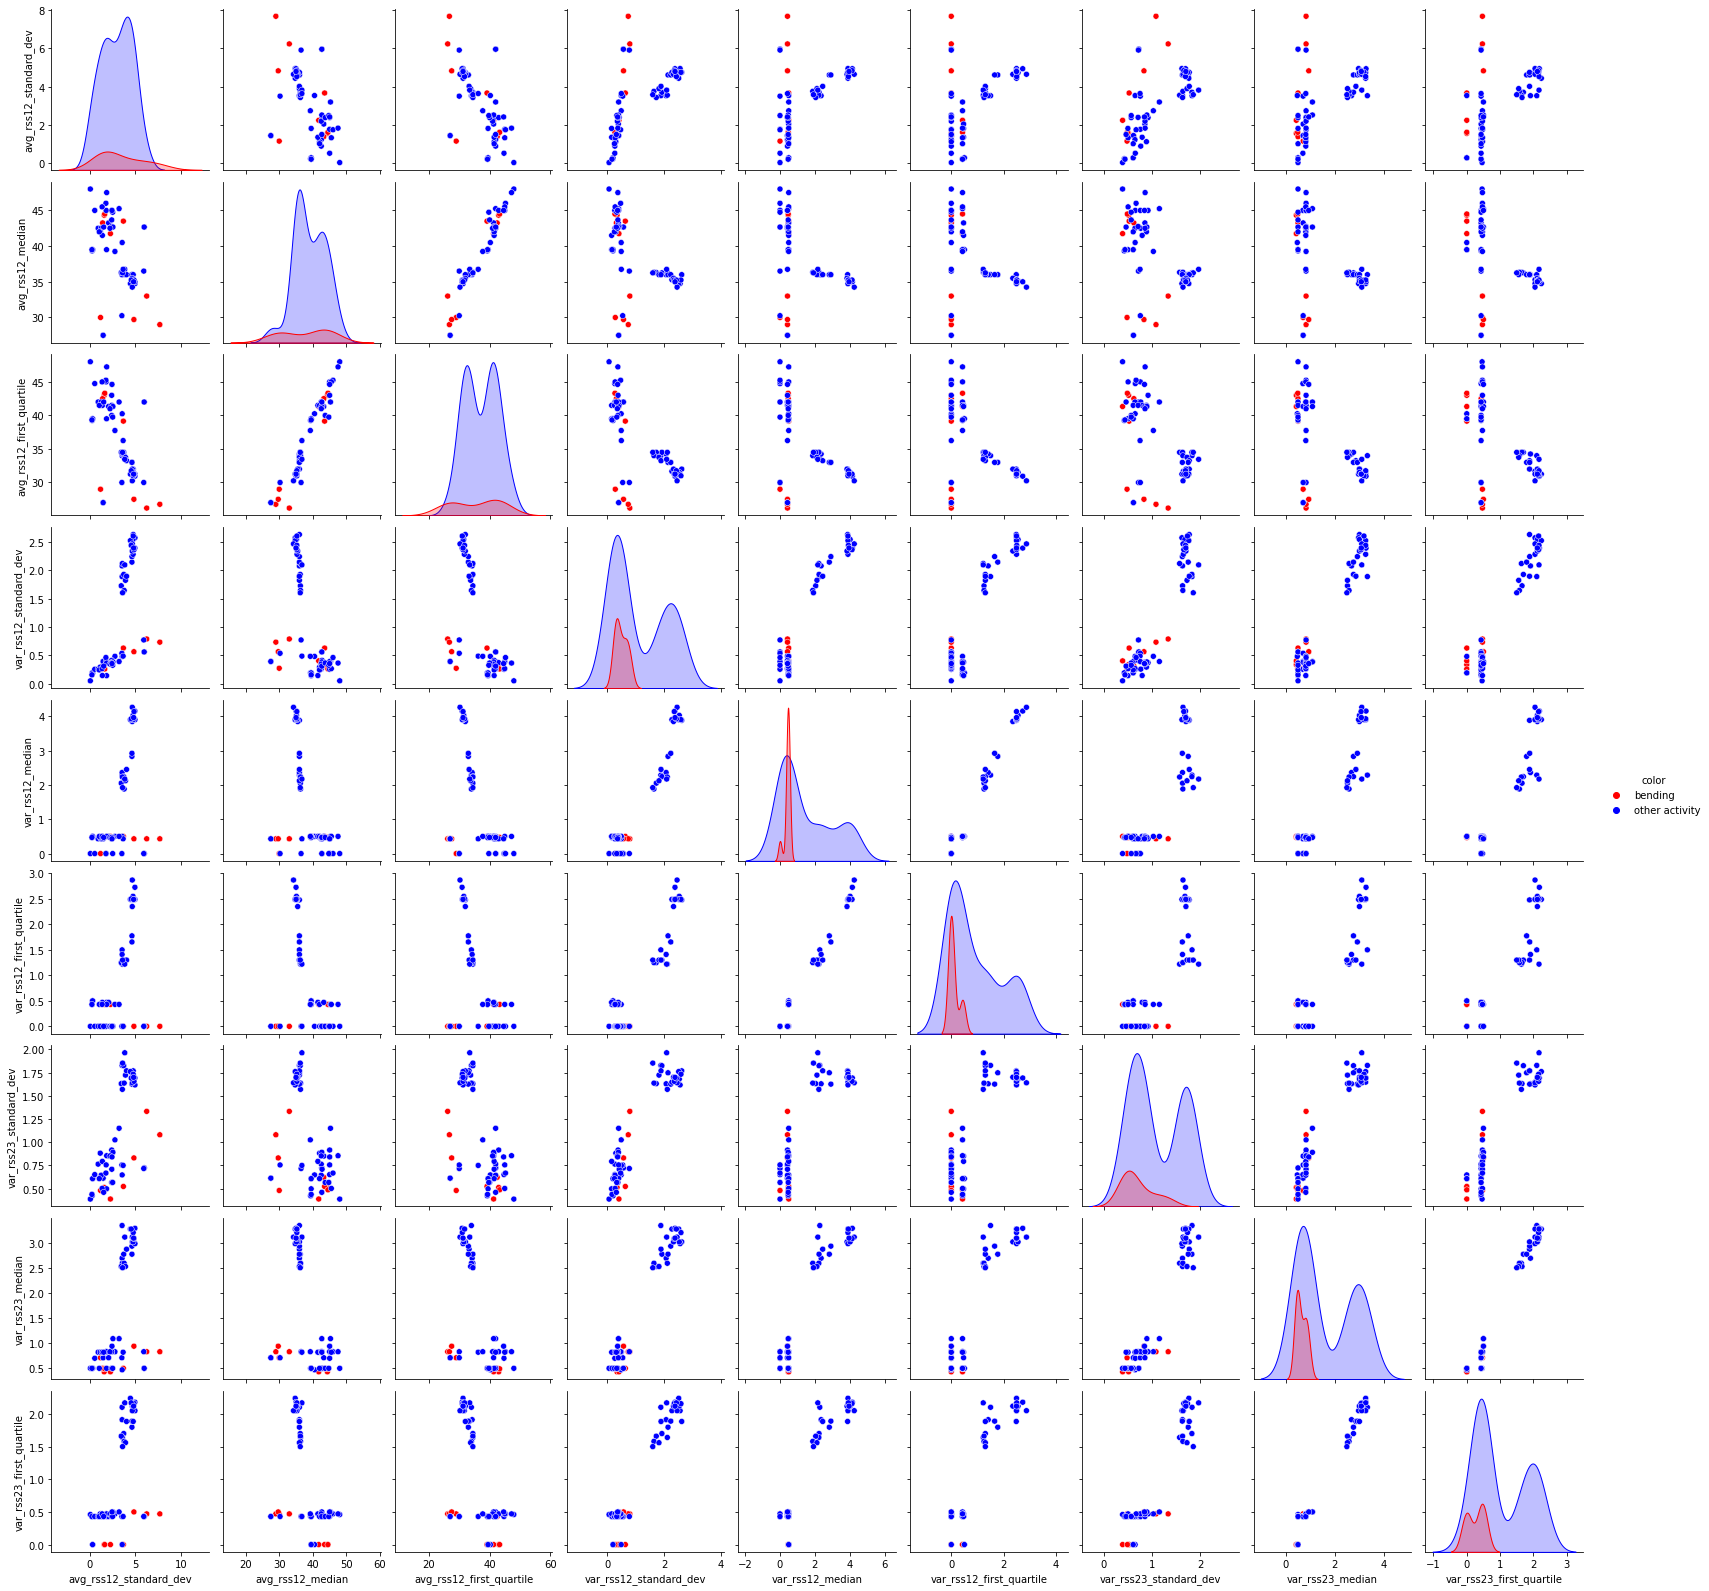

In [13]:
crossplot = sb.pairplot(asdf, hue='color', palette={'bending': 'red', 'other activity': 'blue'})
plt.show(crossplot)

# **PART II)**

In [14]:
# trainingdf
 # we need columns 1, 2, and 6
 # we need std, first quartile, median 
 # ex: col1 std, col1 med, col1 fq, col2 std, ...
 # 9 x 9 plot
 # separate bending1/2 by color

temporarydicthalf = dict()


# FIND STATS 2 FUNCTION
def findstats3(df, datadict, color):
    test = df.iloc[:, [1,2,6]]
    nr = math.floor(len(test.iloc[:,1])/2)
    firsthalf = test.iloc[:nr, :]
    secondhalf = test.iloc[nr:, :]

    #avg_rss12 pt 1
    datadict.setdefault('avg_rss12_standard_dev_1',[]).append(firsthalf['avg_rss12'].std())
    datadict.setdefault('avg_rss12_median_1',[]).append(firsthalf['avg_rss12'].median())
    datadict.setdefault('avg_rss12_first_quartile_1',[]).append(firsthalf['avg_rss12'].quantile(q=0.25))
    
    #avg_rss12 pt 2
    datadict.setdefault('avg_rss12_standard_dev_2',[]).append(secondhalf['avg_rss12'].std())
    datadict.setdefault('avg_rss12_median_2',[]).append(secondhalf['avg_rss12'].median())
    datadict.setdefault('avg_rss12_first_quartile_2',[]).append(secondhalf['avg_rss12'].quantile(q=0.25))
    
    #var_rss12 pt 1
    datadict.setdefault('var_rss12_standard_dev_1',[]).append(firsthalf['var_rss12'].std())
    datadict.setdefault('var_rss12_median_1',[]).append(firsthalf['var_rss12'].median())
    datadict.setdefault('var_rss12_first_quartile_1',[]).append(firsthalf['var_rss12'].quantile(q=0.25))

    #var_rss12 pt 2
    datadict.setdefault('var_rss12_standard_dev_2',[]).append(secondhalf['var_rss12'].std())
    datadict.setdefault('var_rss12_median_2',[]).append(secondhalf['var_rss12'].median())
    datadict.setdefault('var_rss12_first_quartile_2',[]).append(secondhalf['var_rss12'].quantile(q=0.25))

    #var_rss23 pt 1
    datadict.setdefault('var_rss23_standard_dev_1',[]).append(firsthalf['var_rss23'].std())
    datadict.setdefault('var_rss23_median_1',[]).append(firsthalf['var_rss23'].median())
    datadict.setdefault('var_rss23_first_quartile_1',[]).append(firsthalf['var_rss23'].quantile(q=0.25))
    
    #var_rss23 pt 2
    datadict.setdefault('var_rss23_standard_dev_2',[]).append(secondhalf['var_rss23'].std())
    datadict.setdefault('var_rss23_median_2',[]).append(secondhalf['var_rss23'].median())
    datadict.setdefault('var_rss23_first_quartile_2',[]).append(secondhalf['var_rss23'].quantile(q=0.25))
    
    datadict.setdefault('color', []).append(color)
    

# READ FILES, CREATE DATAFRAMES
def createdf3(filepath, startfile, endfile, initdf, mydict, color):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        findstats3(tempdf, mydict, color)
        initdf = pd.concat([initdf, tempdf])
    return initdf
  
    
createdf3(bend1fp, 3, 7, bend1train, temporarydicthalf, 'bending')
createdf3(bend2fp, 3, 6, bend2train, temporarydicthalf, 'bending')
createdf3(cyclingfp, 4, 15, cyclingtrain, temporarydicthalf, 'other activity')
createdf3(lyingfp, 4, 15, lyingtrain, temporarydicthalf, 'other activity')
createdf3(sittingfp, 4, 15, sittingtrain, temporarydicthalf, 'other activity')
createdf3(standingfp, 4, 15, standingtrain, temporarydicthalf, 'other activity')
createdf3(walkingfp, 4, 15, walkingtrain, temporarydicthalf, 'other activity')

td = pd.DataFrame(temporarydicthalf)
# td


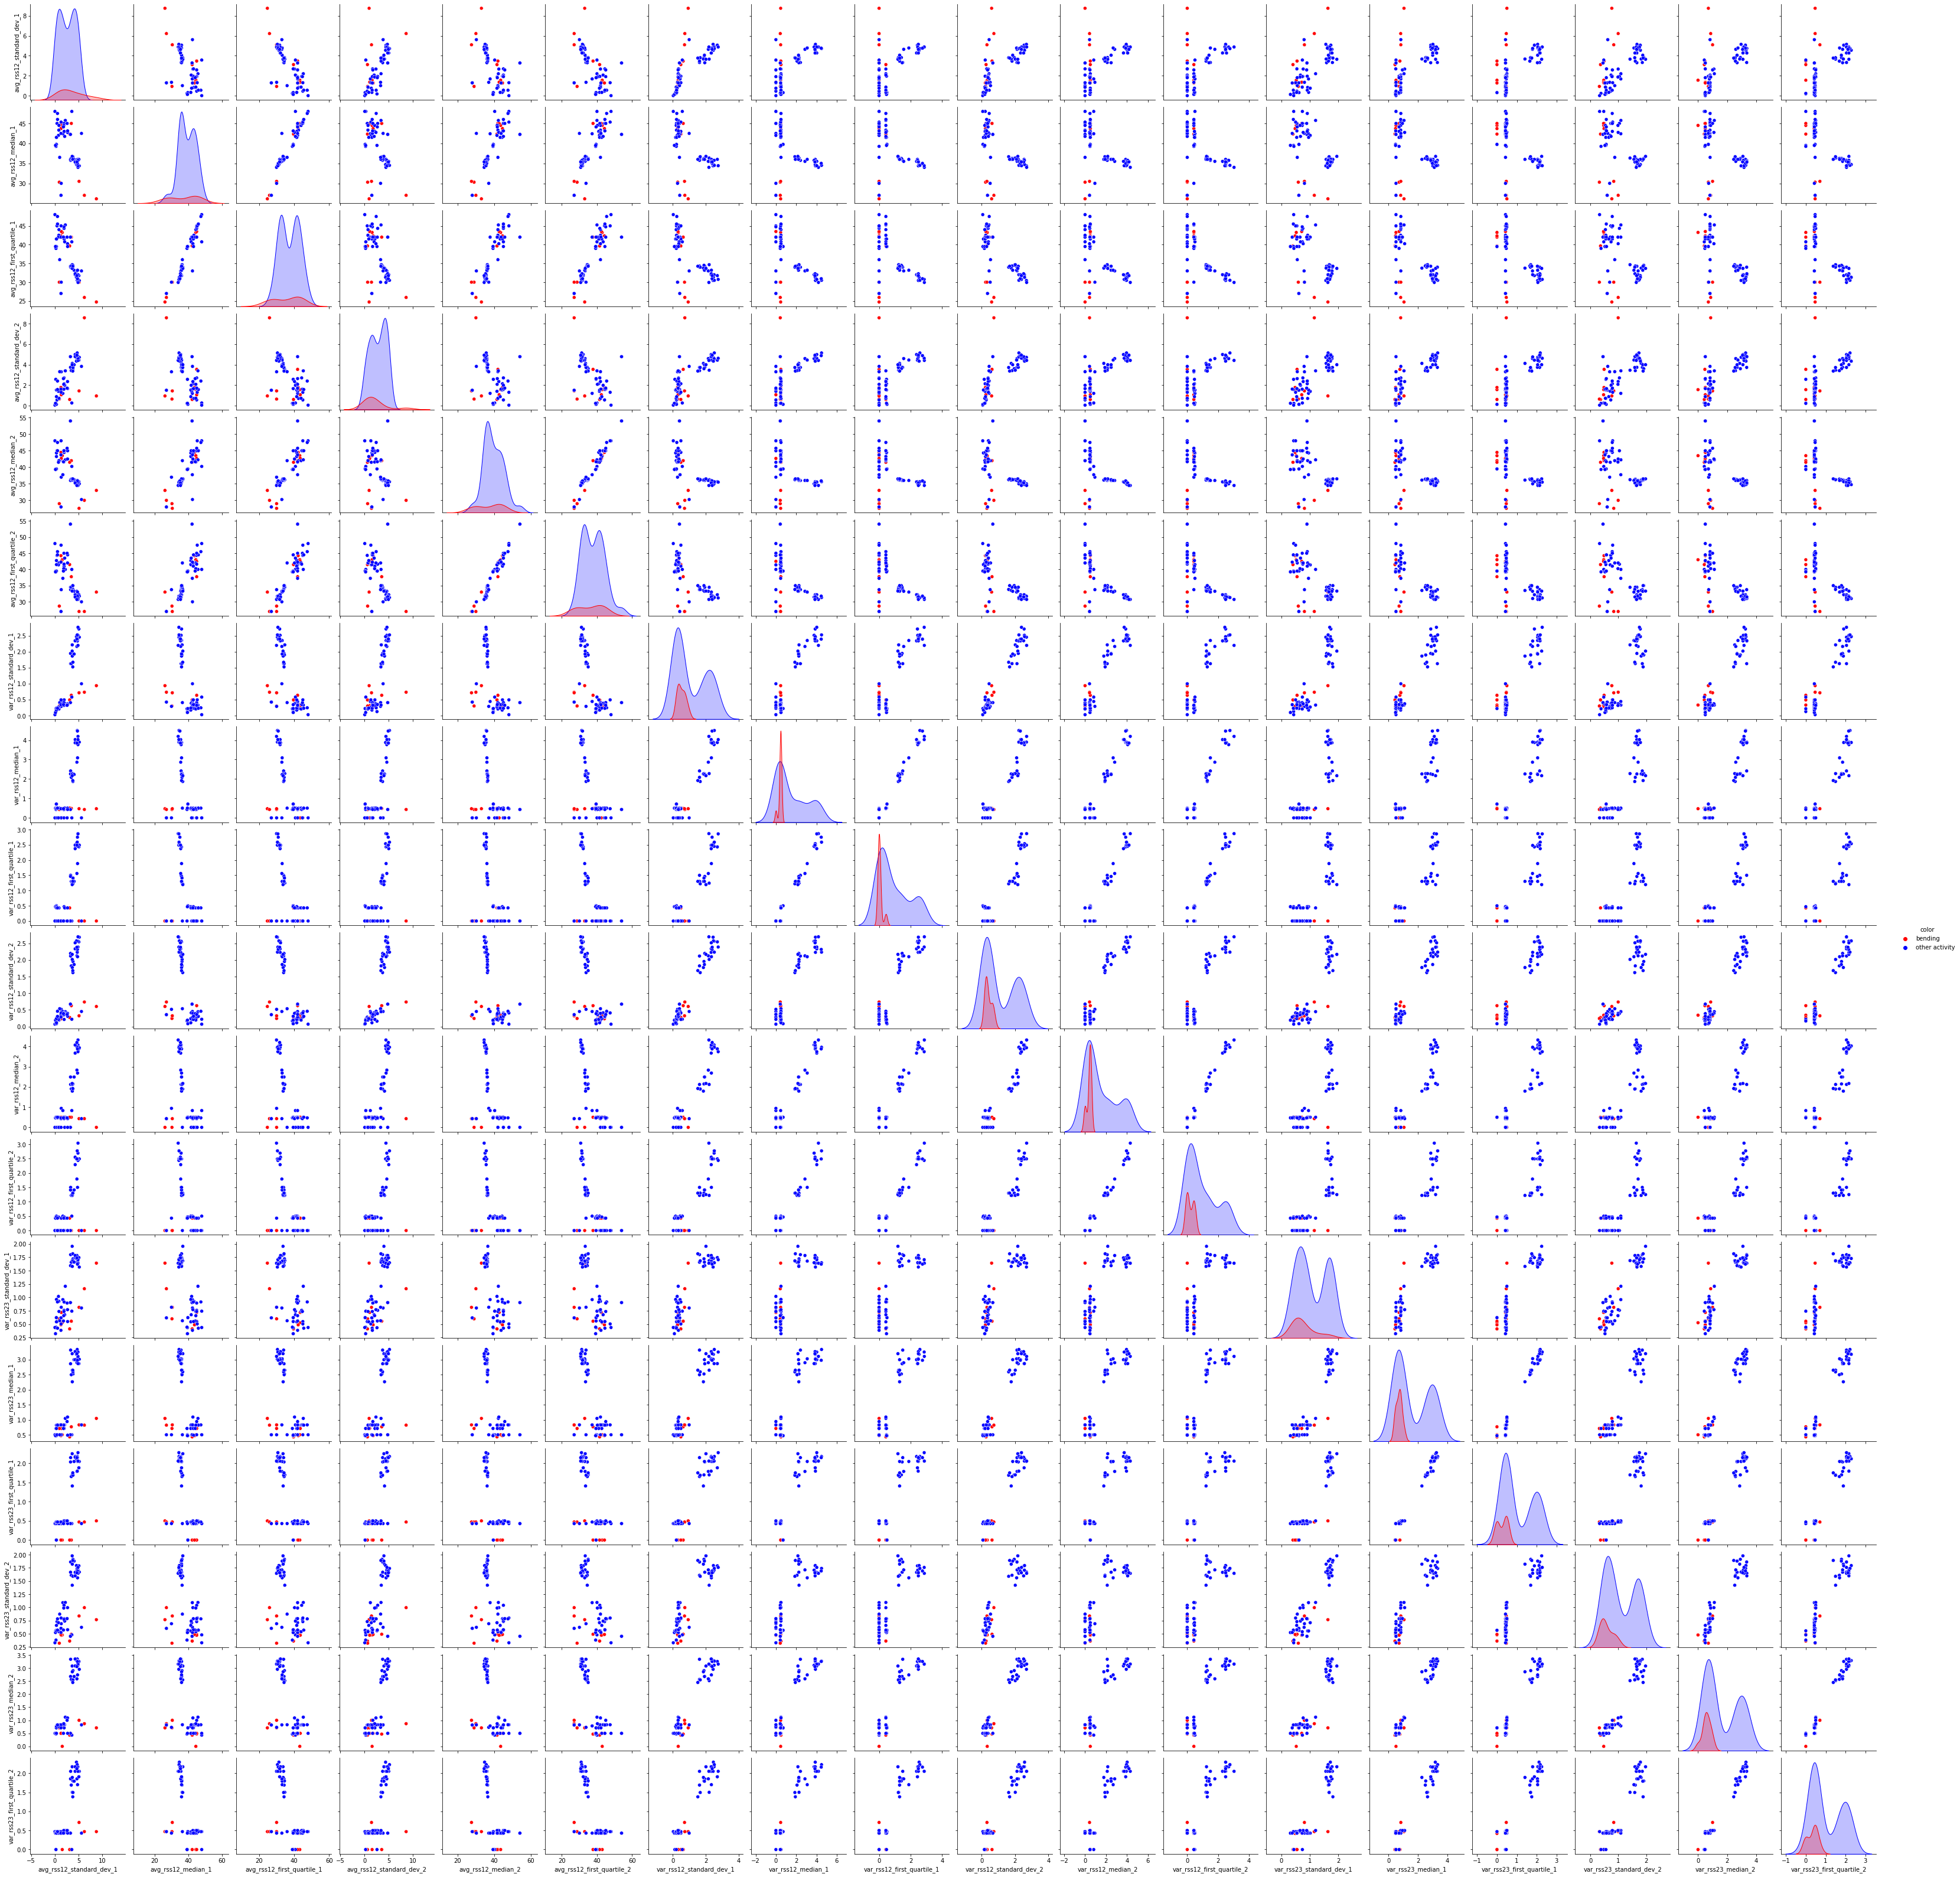

In [15]:
crossplot18 = sb.pairplot(td, hue='color', palette={'bending': 'red', 'other activity': 'blue'})
plt.show(crossplot18)

There seems to be no considerable difference between this 18x18 plot and the 9x9 cross plot other than an exponential increase in the number of time series cross plots (doubling the base set of time series data instances, 9^2 --> (9^2)*(2^2)). 

# **PART III)**

In [16]:
df3ft = dict()


# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def findstats4(df, datadict, color):
    datadict.setdefault('avg_rss12_standard_dev',[]).append(df['avg_rss12'].std())
    datadict.setdefault('avg_rss12_median',[]).append(df['avg_rss12'].median())
    datadict.setdefault('avg_rss12_first_quartile',[]).append(df['avg_rss12'].quantile(q=0.25))
    
    datadict.setdefault('var_rss12_standard_dev',[]).append(df['var_rss12'].std())
    datadict.setdefault('var_rss12_median',[]).append(df['var_rss12'].median())
    datadict.setdefault('var_rss12_first_quartile',[]).append(df['var_rss12'].quantile(q=0.25))
    
    datadict.setdefault('avg_rss13_standard_dev',[]).append(df['avg_rss13'].std())
    datadict.setdefault('avg_rss13_median',[]).append(df['avg_rss13'].median())
    datadict.setdefault('avg_rss13_first_quartile',[]).append(df['avg_rss13'].quantile(q=0.25))
    
    datadict.setdefault('var_rss13_standard_dev',[]).append(df['var_rss13'].std())
    datadict.setdefault('var_rss13_median',[]).append(df['var_rss13'].median())
    datadict.setdefault('var_rss13_first_quartile',[]).append(df['var_rss13'].quantile(q=0.25))

    datadict.setdefault('avg_rss23_standard_dev',[]).append(df['avg_rss23'].std())
    datadict.setdefault('avg_rss23_median',[]).append(df['avg_rss23'].median())
    datadict.setdefault('avg_rss23_first_quartile',[]).append(df['avg_rss23'].quantile(q=0.25))
    
    datadict.setdefault('var_rss23_standard_dev',[]).append(df['var_rss23'].std())
    datadict.setdefault('var_rss23_median',[]).append(df['var_rss23'].median())
    datadict.setdefault('var_rss23_first_quartile',[]).append(df['var_rss23'].quantile(q=0.25))
    
    datadict.setdefault('color', []).append(color)
    

# READ FILES, CREATE DATAFRAMES
def createdf4(filepath, startfile, endfile, initdf, mydict, color):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        findstats4(tempdf, mydict, color)
        initdf = pd.concat([initdf, tempdf])
    return initdf
  
    
createdf4(bend1fp, 3, 7, bend1train, df3ft, 'bending')
createdf4(bend2fp, 3, 6, bend2train, df3ft, 'bending')
createdf4(cyclingfp, 4, 15, cyclingtrain, df3ft, 'other activity')
createdf4(lyingfp, 4, 15, lyingtrain, df3ft, 'other activity')
createdf4(sittingfp, 4, 15, sittingtrain, df3ft, 'other activity')
createdf4(standingfp, 4, 15, standingtrain, df3ft, 'other activity')
createdf4(walkingfp, 4, 15, walkingtrain, df3ft, 'other activity')

df3ft = pd.DataFrame(df3ft)
# df3ft
# df3ft CONTAINS DATA FOR ALL 6 TIME SERIES, 3 SELECTED FEATURES 

In [31]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'other activity', 'other activity', 'other activity', 'other activity', 'other activity']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(1, 21):
    out = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)
    
    out = pd.DataFrame(out)
    trainx = out.drop('color', axis=1)
    trainy = out['color']
    
    logmodel = LogisticRegressionCV(solver='liblinear', cv=5, Cs=20) # Default cv generator uses StratifiedKFold. 5 = 5 folds
    logmodel.fit(trainx, trainy)
    cvlogmodel = RFECV(logmodel, cv=StratifiedKFold(5))
    cvlogmodel = cvlogmodel.fit(trainx, trainy)
    ranks = cvlogmodel.ranking_
    sigfeats = []
    for i in range(len(ranks)):
        if ranks[i] == 1:
            sigfeats.append(i)
    
    sigtrainx = trainx.iloc[:, sigfeats]
    logmodelfinal = LogisticRegressionCV(solver='liblinear', cv=5, Cs=20)
    logmodelfinal.fit(sigtrainx, trainy)
    cv = cross_val_score(logmodelfinal, sigtrainx, trainy, cv=StratifiedKFold(5))
    lpdict[L] = float(np.mean(cv))
    print(np.mean(cv))


        


0.9131868131868132
0.9131868131868133
0.9417582417582417
0.9428571428571428
0.9714285714285715
0.8703296703296702
0.9428571428571428
0.9857142857142858
1.0
1.0
1.0
1.0
1.0
0.9857142857142858
1.0
0.9857142857142858
0.9560439560439562
0.9857142857142858
0.9857142857142858
0.9857142857142858


# **Final (L, p) Summary Table**
### **Note: this table contains the L value and p value (ie 'Score') for the reverse feature extraction cross validation model. The 'score' here is the cross-value score, pulled from the model that has been retrained with insiginificant features extracted (ie RFECV log model).**
The proper way to do cross-valiation for this model is to split the training data into 80-20% groups, where the reverse feature extraction is perfomed according to the data in the 80% training set. This is because we extract insignificant features (performed RFECV) for every value of L according to the training set, so our final test/cv score may be biased if we test our model on the same set we trained the model on.
Plese note: an 80-20 split, and even a 90-10 split created a liblinear convergence error, due to the data sets being too small (even after increasing max_iter). Although the code for an 80-20 split is included, it is not performed here.


In [32]:
# print(lpdict)
print("    L         Score")
print("________________________")
for key, value in lpdict.items():
    print("|{:<10}|{:<10}".format(key, round(value, 5)), "|")
print("------------------------")


    L         Score
________________________
|1         |0.91319    |
|2         |0.91319    |
|3         |0.94176    |
|4         |0.94286    |
|5         |0.97143    |
|6         |0.87033    |
|7         |0.94286    |
|8         |0.98571    |
|9         |1.0        |
|10        |1.0        |
|11        |1.0        |
|12        |1.0        |
|13        |1.0        |
|14        |0.98571    |
|15        |1.0        |
|16        |0.98571    |
|17        |0.95604    |
|18        |0.98571    |
|19        |0.98571    |
|20        |0.98571    |
------------------------


### Conlusion:
We can see that L=9 gives us the best model, as it is the lowest L value to give us a score of 1 (highest possible score). We choose the lowest L value to prevent the possibility of overfitting, given that the more features we have, the higher the likelihood of overfitting our model to the data.

# **Part IV**

In [61]:
# RETRAINING THE MODEL, ONLY WHEN L = 9
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'other activity', 'other activity', 'other activity', 'other activity', 'other activity']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(9, 10):
    out4 = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out4, bendingvsother[i], L)
    
    out4 = pd.DataFrame(out4)
    trainx = out4.drop('color', axis=1)
    trainy = out4['color']
    
#     trainx75, trainx25 = train_test_split(trainx, test_size=0.30)
#     trainy75, trainy25 = train_test_split(trainy, test_size=0.3)
    
    logmodel = LogisticRegressionCV(solver='liblinear', cv=5, Cs=20) # Default cv generator uses StratifiedKFold. 5 = 5 folds
    logmodel.fit(trainx, trainy)
#     logmodel.fit(trainx75, trainy75)
    cvlogmodel = RFECV(logmodel, cv=StratifiedKFold(5))
    cvlogmodel = cvlogmodel.fit(trainx, trainy)
#     cvlogmodel = cvlogmodel.fit(trainx75, trainy75)
    ranks = cvlogmodel.ranking_
    sigfeats = []
    for i in range(len(ranks)):
        if ranks[i] == 1:
            sigfeats.append(i)
    
    sigtrainx = trainx.iloc[:, sigfeats]
#     sigtrainx25 = trainx25.iloc[:, sigfeats]

    logmodelfinal = LogisticRegressionCV(solver='liblinear', cv=5, Cs=20)
    logmodelfinal.fit(sigtrainx, trainy)
    cv = cross_val_score(logmodelfinal, sigtrainx, trainy, cv=StratifiedKFold(5))
    lpdict[L] = float(np.mean(cv))
    print(np.mean(cv))


        


0.9714285714285715


## **CONFUSION MATRIX**

In [72]:
predictions = logmodelfinal.predict(sigtrainx)
confusion_matrix = sklearn.metrics.confusion_matrix(trainy, predictions)
print("Confusion Matrix:")
print(confusion_matrix)
true_pos = confusion_matrix[1, 1]
true_neg = confusion_matrix[0, 0]
false_neg = confusion_matrix[1, 0]
false_pos = confusion_matrix[0, 1]

print("True Negative (predicted bending, true bending):", true_neg)
print("False Positive (predicted other activity, true bending):", false_pos)
print("False Negative (predicted bending, true other activity):", false_neg)
print("True Positive (predicted other activity, true other activity):", true_pos)

print("\nNote: bending = negative")


Confusion Matrix:
[[ 7  2]
 [ 0 60]]
True Negative (predicted bending, true bending): 7
False Positive (predicted other activity, true bending): 2
False Negative (predicted bending, true other activity): 0
True Positive (predicted other activity, true other activity): 60

Note: bending = negative


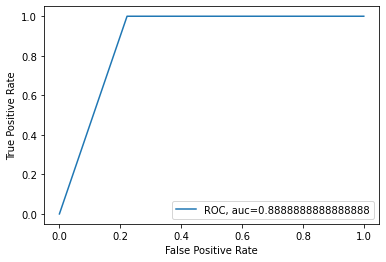

In [12]:
# RocCurveDisplay.from_predictions(trainy, predictions)
# plt.show()
roctrainy = []
rocpredicty = []
for obs in trainy:
    if obs == 'bending':
        roctrainy.append(0)
    else:
        roctrainy.append(1)
        
for obs in predictions:
    if obs == 'bending':
        rocpredicty.append(0)
    else:
        rocpredicty.append(1)

fpr, tpr, _ = roc_curve(roctrainy,  rocpredicty)
auc = roc_auc_score(roctrainy, rocpredicty)
plt.plot(fpr, tpr,label="ROC, auc="+str(auc))
# print(fpr, tpr)
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [13]:
coefficients = logmodelfinal.coef_
# print(coefficients)
# print(sigfeats)
# print(trainx)
trainidk = trainx.iloc[:, sigfeats]
coefficient_names = []
for col in trainidk.columns:
    coefficient_names.append(col)

avg_rss23_quantile_1 : -0.12307735701461898
avg_rss23_median_2 : -0.13756741803296627
avg_rss23_quantile_3 : -0.12314011049563608
avg_rss12_median_7 : 0.22353498986494827


In [19]:
# print(trainidk)
# print(trainy)
logit_model=sm.Logit(roctrainy,trainidk) # trainy need 0,1 binary vars (stored in roctrainy df)
result=logit_model.fit(method='lbfgs')
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                   1.000
Time:                        00:59:04   Log-Likelihood:            -0.00027913
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.481e-11
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
avg_rss23_quantile_1    -1.2578   1.39e+04  -9.08e-05      1.000   -2.72e+04    2.72e+04
avg_rss23_median_2      -4.8551   1.23e+04     -0.000      1.000   -2.42e+04    2.42e+04
avg_rss23_qu

### **Report Significant coefficients and their corresponding beta values**

In [38]:
p_vals = [1, 1, 1, 0.999 ]
print("\nSIGNIFICANT COEFFICIENTS + P-VALUES")
for c in range(len(coefficient_names)):
    print("-----------------------------------------------------------------------------------")
    print("| Feature:", coefficient_names[c], "| Coefficient:", coefficients[0][c], "| p-val:", p_vals[c], "  |")
print("------------------------------------------------------------------------------------")



SIGNIFICANT COEFFICIENTS + P-VALUES
-----------------------------------------------------------------------------------
| Feature: avg_rss23_quantile_1 | Coefficient: -0.12307735701461898 | p-val: 1   |
-----------------------------------------------------------------------------------
| Feature: avg_rss23_median_2 | Coefficient: -0.13756741803296627 | p-val: 1   |
-----------------------------------------------------------------------------------
| Feature: avg_rss23_quantile_3 | Coefficient: -0.12314011049563608 | p-val: 1   |
-----------------------------------------------------------------------------------
| Feature: avg_rss12_median_7 | Coefficient: 0.22353498986494827 | p-val: 0.999   |
------------------------------------------------------------------------------------


#### Note: the high p-values are the result of quasi-separation, predictors may be too effective (ie one or more predictors may perfectly determine the y-values). The statsmodels api was used for this regression as sklearn does not have an effective method of calculating p-values for logistic regressions. 

# **PART V**

## **Testing classifier on test set**

In [69]:
# RETRAINING THE MODEL, ONLY WHEN L = 9
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
toread = [[1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3]]
bendingvsother = ['bending', 'bending', 'other activity', 'other activity', 'other activity', 'other activity', 'other activity']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

out5 = dict()
for i in range(len(movements)):
    Lcreatedf(movements[i], toread[i][0], toread[i][1], out5, bendingvsother[i], 9)

    
# not enough observations, so we must resample
out5 = pd.DataFrame(out5)
un = out5[out5['color'] == 'bending']
other = out5[out5['color'] != 'bending']
df_y_res = resample(un, n_samples=10, replace=True)
df_res = pd.concat([df_y_res, other])
# df_res

testx = df_res.drop('color', axis=1)
testy = df_res['color']
sigtestx = testx.iloc[:, sigfeats]

score = logmodelfinal.score(sigtestx, testy)
cv = cross_val_score(logmodelfinal, sigtestx, testy, cv=StratifiedKFold(5))
print(score, cv)



1.0 [1. 1. 1. 1. 1.]


## **Compare accuracy on test set with cross-validation accuracy previously obtained**

In [65]:
print("CV Score for Model:", 0.9714)
print("Accuracy Score:", score)

CV Score for Model: 0.9714
Accuracy Score: 1.0


As we can see from the above metrics, our accuracy score for the test data set (with resampling) using our trained model with L=9, 5 Stratified K Folds is 1. This is better than the cross-validation score for our training set, and may potentially be because of the small sample size in our testing data set. Regardless, our model seems to accurately predict our data. 

# **PART VI**
### **Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?**

Yes, the classes seem to be very well-separated. We can see this in our p-values for each of the parameters, which are all close or equal to 1. This indicated near perfect separation, as each of the parameters nearly perfectly predicts the value of y (bending/vs other activity). This well-separated nature is siginificant enough to correlate with instability in our model. 

# **PART VII**
### **From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.**

Our previous confusion matrix:


[ 7       2 ]

[ 0      60 ]
 
True Negative (predicted bending, true bending): 7
False Positive (predicted other activity, true bending): 2
False Negative (predicted bending, true other activity): 0
True Positive (predicted other activity, true other activity): 60

Note: bending = negative

We can see here that our classes are imbalanced. We have a total of 60 other activity/positive observations (TP + FN) and 9 bending/negative operations (TN + FP). We have no False Negative cases, as estimation for bending/negative is highly unlikely given so few instances of this class. Our confusion matrix, with 60 vs 9 (other activity vs bending) instances, shows we have imbalanced classes. 

### **Refitting model with case-control sampling**

In [80]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'other activity', 'other activity', 'other activity', 'other activity', 'other activity']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(1, 21):
    outres = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], outres, bendingvsother[i], L)
    
    outres = pd.DataFrame(outres)
    
    # resampling 
    un = outres[outres['color'] == 'bending']
    other = outres[outres['color'] != 'bending']
    df_y_res = resample(un, n_samples=60, replace=True)
    df_res = pd.concat([df_y_res, other])
#     print(df_res)

    trainx = df_res.drop('color', axis=1)
    trainy = df_res['color']
#     print(trainy)
#     break
    
    logmodel = LogisticRegressionCV(solver='liblinear', cv=5, Cs=15) # Default cv generator uses StratifiedKFold. 5 = 5 folds
    logmodel.fit(trainx, trainy)
    cvlogmodel = RFECV(logmodel, cv=StratifiedKFold(5))
    cvlogmodel = cvlogmodel.fit(trainx, trainy)
    ranks = cvlogmodel.ranking_
    sigfeats = []
    for i in range(len(ranks)):
        if ranks[i] == 1:
            sigfeats.append(i)
    
    sigtrainx = trainx.iloc[:, sigfeats]
    logmodelfinal = LogisticRegressionCV(solver='liblinear', cv=5, Cs=10)
    logmodelfinal.fit(sigtrainx, trainy)
    cv = cross_val_score(logmodelfinal, sigtrainx, trainy, cv=StratifiedKFold(5))
    lpdict[L] = float(np.mean(cv))
    print(np.mean(cv))



0.975
0.9583333333333334
0.9833333333333334
0.6083333333333333
0.975
0.9916666666666668
0.7416666666666667
0.9916666666666668
0.9833333333333334
0.9916666666666668
0.9916666666666668
1.0
0.9916666666666668
0.9666666666666668
1.0
0.9833333333333334
0.975
1.0
1.0
0.9916666666666668


## **Final (L, p) Table**

In [81]:
# print(lpdict)
print("    L         Score")
print("________________________")
for key, value in lpdict.items():
    print("|{:<10}|{:<10}".format(key, round(value, 5)), "|")
print("------------------------")


    L         Score
________________________
|1         |0.975      |
|2         |0.95833    |
|3         |0.98333    |
|4         |0.60833    |
|5         |0.975      |
|6         |0.99167    |
|7         |0.74167    |
|8         |0.99167    |
|9         |0.98333    |
|10        |0.99167    |
|11        |0.99167    |
|12        |1.0        |
|13        |0.99167    |
|14        |0.96667    |
|15        |1.0        |
|16        |0.98333    |
|17        |0.975      |
|18        |1.0        |
|19        |1.0        |
|20        |0.99167    |
------------------------


We can see from the above table that the best L value = 12 when resampling, as it has the highest CV score. Although multiple L's have a CV score of 1, 12 is the lowest L value, which is why we select it as the optimal value. Larger L values may have high scores due to overfitting. 

In [82]:
# RETRAINING THE MODEL, ONLY WHEN L = 12
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'other activity', 'other activity', 'other activity', 'other activity', 'other activity']
# lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(12, 13):
    a = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], a, bendingvsother[i], L)
    
    a = pd.DataFrame(a)
    
    # resampling 
    un = a[a['color'] == 'bending']
    other = a[a['color'] != 'bending']
    df_y_res = resample(un, n_samples=60, replace=True)
    df_res = pd.concat([df_y_res, other])
#     print(df_res)

    trainx = df_res.drop('color', axis=1)
    trainy = df_res['color']
#     print(trainy)
#     break
    
    logmodel = LogisticRegressionCV(solver='liblinear', cv=5, Cs=15) # Default cv generator uses StratifiedKFold. 5 = 5 folds
    logmodel.fit(trainx, trainy)
    cvlogmodel = RFECV(logmodel, cv=StratifiedKFold(5))
    cvlogmodel = cvlogmodel.fit(trainx, trainy)
    ranks = cvlogmodel.ranking_
    sigfeats = []
    for i in range(len(ranks)):
        if ranks[i] == 1:
            sigfeats.append(i)
    
    sigtrainx = trainx.iloc[:, sigfeats]
    logmodelfinal = LogisticRegressionCV(solver='liblinear', cv=5, Cs=10)
    logmodelfinal.fit(sigtrainx, trainy)
    cv = cross_val_score(logmodelfinal, sigtrainx, trainy, cv=StratifiedKFold(5))
#     lpdict[L] = float(np.mean(cv))
    print(np.mean(cv))


        


0.9916666666666668


## **Confusion Matrix, ROC Curve, AUC of Resampled Model**

In [83]:
predictions = logmodelfinal.predict(sigtrainx)
confusion_matrix = sklearn.metrics.confusion_matrix(trainy, predictions)
print("Confusion Matrix:")
print(confusion_matrix)
true_pos = confusion_matrix[1, 1]
true_neg = confusion_matrix[0, 0]
false_neg = confusion_matrix[1, 0]
false_pos = confusion_matrix[0, 1]

print("True Negative (predicted bending, true bending):", true_neg)
print("False Positive (predicted other activity, true bending):", false_pos)
print("False Negative (predicted bending, true other activity):", false_neg)
print("True Positive (predicted other activity, true other activity):", true_pos)

print("\nNote: bending = negative")


Confusion Matrix:
[[60  0]
 [ 0 60]]
True Negative (predicted bending, true bending): 60
False Positive (predicted other activity, true bending): 0
False Negative (predicted bending, true other activity): 0
True Positive (predicted other activity, true other activity): 60

Note: bending = negative


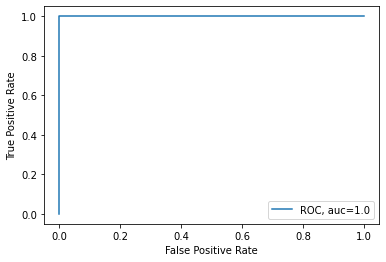

In [84]:
# RocCurveDisplay.from_predictions(trainy, predictions)
# plt.show()
roctrainy = []
rocpredicty = []
for obs in trainy:
    if obs == 'bending':
        roctrainy.append(0)
    else:
        roctrainy.append(1)
        
for obs in predictions:
    if obs == 'bending':
        rocpredicty.append(0)
    else:
        rocpredicty.append(1)

fpr, tpr, _ = roc_curve(roctrainy,  rocpredicty)
auc = roc_auc_score(roctrainy, rocpredicty)
plt.plot(fpr, tpr,label="ROC, auc="+str(auc))
# print(fpr, tpr)
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


## **Using Test Data**

In [88]:
# RETRAINING THE MODEL, ONLY WHEN L = 9
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
toread = [[1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3]]
bendingvsother = ['bending', 'bending', 'other activity', 'other activity', 'other activity', 'other activity', 'other activity']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

d = dict()
for i in range(len(movements)):
    Lcreatedf(movements[i], toread[i][0], toread[i][1], d, bendingvsother[i], 12)

    
# not enough observations, so we must resample
d = pd.DataFrame(d)
un = d[d['color'] == 'bending']
other = d[d['color'] != 'bending']
df_y_res = resample(un, n_samples=10, replace=True)
df_res = pd.concat([df_y_res, other])
# df_res

testx = df_res.drop('color', axis=1)
testy = df_res['color']
sigtestx = testx.iloc[:, sigfeats]

score = logmodelfinal.score(sigtestx, testy)
cv = np.mean(cross_val_score(logmodelfinal, sigtestx, testy, cv=StratifiedKFold(5)))
print(score, cv)



1.0 0.9199999999999999


## Confusion Matrix, ROC and Auc, CV vs Accuracy Score for TEST SET

In [89]:
print("CV Score for Model:", cv)
print("Accuracy Score:", score)

CV Score for Model: 0.9199999999999999
Accuracy Score: 1.0


In [90]:
predictions = logmodelfinal.predict(sigtestx)
confusion_matrix = sklearn.metrics.confusion_matrix(testy, predictions)
print("Confusion Matrix:")
print(confusion_matrix)
true_pos = confusion_matrix[1, 1]
true_neg = confusion_matrix[0, 0]
false_neg = confusion_matrix[1, 0]
false_pos = confusion_matrix[0, 1]

print("True Negative (predicted bending, true bending):", true_neg)
print("False Positive (predicted other activity, true bending):", false_pos)
print("False Negative (predicted bending, true other activity):", false_neg)
print("True Positive (predicted other activity, true other activity):", true_pos)

print("\nNote: bending = negative")

Confusion Matrix:
[[10  0]
 [ 0 15]]
True Negative (predicted bending, true bending): 10
False Positive (predicted other activity, true bending): 0
False Negative (predicted bending, true other activity): 0
True Positive (predicted other activity, true other activity): 15

Note: bending = negative


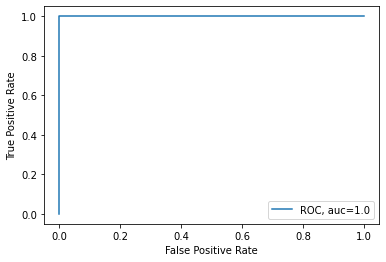

In [92]:
roctesty = []
rocpredictyy = []
for obs in testy:
    if obs == 'bending':
        roctesty.append(0)
    else:
        roctesty.append(1)
        
for obs in predictions:
    if obs == 'bending':
        rocpredictyy.append(0)
    else:
        rocpredictyy.append(1)

fpr, tpr, _ = roc_curve(roctesty,  rocpredictyy)
auc = roc_auc_score(roctesty, rocpredictyy)
plt.plot(fpr, tpr,label="ROC, auc="+str(auc))
# print(fpr, tpr)
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


# PART B
## Binary Classification Using L1-Penalized Logistic Regression

In [50]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'other activity', 'other activity', 'other activity', 'other activity', 'other activity']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(1, 21):
    e = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], e, bendingvsother[i], L)
    
    e = pd.DataFrame(e)
    trainx = e.drop('color', axis=1)
    trainy = e['color']

    # normalized data 
    scaler = MinMaxScaler()
    model = scaler.fit(trainx)
    norm_x_train = model.transform(trainx)

    
    logmodel = LogisticRegressionCV(solver='liblinear', cv=5, Cs=10, penalty='l1') # Default cv generator uses StratifiedKFold. 5 = 5 folds
    logmodel.fit(norm_x_train, trainy)
    coefs = logmodel.coef_
    cvals = logmodel.C_
#     print(coefs)
#     cvlogmodel = RFECV(logmodel, cv=StratifiedKFold(5))
#     cvlogmodel = cvlogmodel.fit(trainx, trainy)
#     ranks = cvlogmodel.ranking_
#     sigfeats = []
#     for i in range(len(coefs[0])):
#         if coefs[0][i] != 0:
#             sigfeats.append(i)
#     print(sigfeats)
    
#     sigtrainx = trainx.iloc[:, sigfeats]
#     logmodelfinal = LogisticRegressionCV(solver='liblinear', cv=5, Cs=10)
#     logmodelfinal.fit(sigtrainx, trainy)
    cv = cross_val_score(logmodel, norm_x_train, trainy, cv=StratifiedKFold(5))
    lpdict[L] = [float(np.mean(cv)), cvals]
    print(np.mean(cv), cvals)
    


        


0.8274725274725275 [2.7825594]
0.856043956043956 [1291.54966501]
0.9285714285714286 [2.7825594]
0.9131868131868133 [21.5443469]
0.8989010989010989 [166.81005372]
0.8846153846153847 [166.81005372]
0.8703296703296702 [2.7825594]
0.9274725274725275 [1291.54966501]
0.9131868131868132 [21.5443469]
0.9428571428571428 [2.7825594]
0.9285714285714286 [21.5443469]
0.9285714285714286 [2.7825594]
0.8703296703296705 [10000.]
0.8989010989010989 [166.81005372]
0.8989010989010989 [21.5443469]
0.9274725274725275 [2.7825594]
0.8989010989010989 [2.7825594]
0.9428571428571428 [21.5443469]
0.8846153846153847 [1291.54966501]
0.8846153846153847 [21.5443469]


In [59]:
# print(lpdict)
print("    L         Score      C")
print("___________________________________")
for key, value in lpdict.items():
    print("|{:<10}|{:<10}|{:<10}".format(key, round(value[0], 5), round(value[1][0], 5)), '|')
print("-----------------------------------")


    L         Score      C
___________________________________
|1         |0.82747   |2.78256    |
|2         |0.85604   |1291.54967 |
|3         |0.92857   |2.78256    |
|4         |0.91319   |21.54435   |
|5         |0.8989    |166.81005  |
|6         |0.88462   |166.81005  |
|7         |0.87033   |2.78256    |
|8         |0.92747   |1291.54967 |
|9         |0.91319   |21.54435   |
|10        |0.94286   |2.78256    |
|11        |0.92857   |21.54435   |
|12        |0.92857   |2.78256    |
|13        |0.87033   |10000.0    |
|14        |0.8989    |166.81005  |
|15        |0.8989    |21.54435   |
|16        |0.92747   |2.78256    |
|17        |0.8989    |2.78256    |
|18        |0.94286   |21.54435   |
|19        |0.88462   |1291.54967 |
|20        |0.88462   |21.54435   |
-----------------------------------


## Optimal L: L = 10, lowest value of L with highest score. 

(Note: scores are for training set)

### L1-penalized Classification Score: 0.94286
### RFECV Classification Score: 0.9916666666666668

As we can see, the RFECV score is higher, and thus our model that was created using reverse feature extraction given p-values is the better performing model. However, the L1-penalized variable selection model was easier to implement, and had a a *significantly* faster run time (about 1 minute compared to ~45 minutes). 


# PART C
## Multinomial Regression
# Part C i)

In [147]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(1, 21):
    out = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)
    
    out = pd.DataFrame(out)
    trainx = out.drop('color', axis=1)
    trainy = out['color']
#     print(trainy)
#     break

    # normalized data 
    scaler = MinMaxScaler()
    model = scaler.fit(trainx)
    norm_x_train = model.transform(trainx)

    
    logmodel = LogisticRegressionCV(solver='saga', cv=5, Cs=10, multi_class='multinomial', penalty='l1', max_iter=7000) # Default cv generator uses StratifiedKFold. 5 = 5 folds
    logmodel.fit(norm_x_train, trainy)
    coefs = logmodel.coef_
    
    cv = cross_val_score(logmodel, norm_x_train, trainy, cv=StratifiedKFold(5))
    lpdict[L] = float(np.mean(cv))
    print(np.mean(cv))
    

0.8406593406593407
0.8846153846153847
0.8263736263736263
0.8417582417582418
0.8549450549450549
0.8406593406593407
0.8263736263736263
0.7824175824175825
0.7681318681318682
0.8263736263736263
0.7681318681318681
0.7978021978021979
0.798901098901099
0.7538461538461538
0.7538461538461538
0.7846153846153847
0.7824175824175824
0.7835164835164835
0.7978021978021979
0.7835164835164835


In [148]:
# print(lpdict)
print("    L         Score")
print("________________________")
for key, value in lpdict.items():
    print("|{:<10}|{:<10}".format(key, round(value, 5)), "|")
print("------------------------")


    L         Score
________________________
|1         |0.84066    |
|2         |0.88462    |
|3         |0.82637    |
|4         |0.84176    |
|5         |0.85495    |
|6         |0.84066    |
|7         |0.82637    |
|8         |0.78242    |
|9         |0.76813    |
|10        |0.82637    |
|11        |0.76813    |
|12        |0.7978     |
|13        |0.7989     |
|14        |0.75385    |
|15        |0.75385    |
|16        |0.78462    |
|17        |0.78242    |
|18        |0.78352    |
|19        |0.7978     |
|20        |0.78352    |
------------------------


## L1-Penalized Multinomial Regression Model, best L and Score (Training set) 
### Optimal L: L = 2
### Score: 0.88462

### Retrain on L = 2

In [61]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(2, 3):
    out = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)
    
    out = pd.DataFrame(out)
    trainx = out.drop('color', axis=1)
    trainy = out['color']
#     print(trainy)
#     break

    # normalized data 
    scaler = MinMaxScaler()
    model = scaler.fit(trainx)
    norm_x_train = model.transform(trainx)

    
    logmodel = LogisticRegressionCV(solver='saga', cv=5, Cs=10, multi_class='multinomial', penalty='l1', max_iter=7000) # Default cv generator uses StratifiedKFold. 5 = 5 folds
    logmodel.fit(norm_x_train, trainy)
    coefs = logmodel.coef_
#     cvals = logmodel.C_
    
    cv = cross_val_score(logmodel, norm_x_train, trainy, cv=StratifiedKFold(5))
    lpdict[L] = float(np.mean(cv)), cvals
    print(np.mean(cv))
    

0.8846153846153847


## L1-Penalized Multinomial Regression Model on Test Data

In [62]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(2, 3):
    out = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)
    
    out = pd.DataFrame(out)
    
#     not enough observations, so we must resample for a min of 5 obs in each class 
#     print(out)
    un = out[out['color'] == 'bending']
    other = out[out['color'] != 'bending']
    df_y_res = resample(un, n_samples=7, replace=True)
    df_res = pd.concat([df_y_res, other])
    
    un = df_res[df_res['color'] == 'cycling']
    other = df_res[df_res['color'] != 'cycling']
    df_y_res = resample(un, n_samples=7, replace=True)
    df_res = pd.concat([df_y_res, other])
    
    un = df_res[df_res['color'] == 'lying']
    other = df_res[df_res['color'] != 'lying']
    df_y_res = resample(un, n_samples=7, replace=True)
    df_res = pd.concat([df_y_res, other])
    
    un = df_res[df_res['color'] == 'sitting']
    other = df_res[df_res['color'] != 'sitting']
    df_y_res = resample(un, n_samples=7, replace=True)
    df_res = pd.concat([df_y_res, other])
    
    un = df_res[df_res['color'] == 'standing']
    other = df_res[df_res['color'] != 'standing']
    df_y_res = resample(un, n_samples=7, replace=True)
    df_res = pd.concat([df_y_res, other])
    
    un = df_res[df_res['color'] == 'walking']
    other = df_res[df_res['color'] != 'walking']
    df_y_res = resample(un, n_samples=7, replace=True)
    df_res = pd.concat([df_y_res, other])
    
    
#     print(df_res)
#     break
#     print(logmodel)

    testx = df_res.drop('color', axis=1)
    testy = df_res['color']

    # normalized data 
    scaler = MinMaxScaler()
    model = scaler.fit(testx)
    norm_x_test = model.transform(testx)
    cv = cross_val_score(logmodel, norm_x_test, testy, cv=StratifiedKFold(5))
    score = logmodel.score(norm_x_test, testy)

#     lpdict[L] = float(np.mean(cv))
    print(np.mean(cv))
    

0.95


In [63]:
print("Test CV Score for Model:", np.mean(cv))
print("Test Accuracy Score:", score)
print("Test Error: ", (1-score))

Test CV Score for Model: 0.95
Test Accuracy Score: 0.8333333333333334
Test Error:  0.16666666666666663


In [64]:
predict = logmodel.predict(norm_x_test)
rocpredict = []
for elt in predict:
    if elt == 'bending':
        rocpredict.append(0)
    elif elt == 'cycling':
        rocpredict.append(1)
    elif elt == 'lying':
        rocpredict.append(2)
    elif elt == 'sitting':
        rocpredict.append(3)
    elif elt == 'standing':
        rocpredict.append(4)
    else:
        rocpredict.append(5)

testy = list(testy)
roctesty = []
for elt in testy:
    if elt == 'bending':
        roctesty.append(0)
    elif elt == 'cycling':
        roctesty.append(1)
    elif elt == 'lying':
        roctesty.append(2)
    elif elt == 'sitting':
        roctesty.append(3)
    elif elt == 'standing':
        roctesty.append(4)
    else:
        roctesty.append(5)

# print(type(roctesty))
# print(type(rocpredict))
conf = confusion_matrix(roctesty, rocpredict)
print("Confusion Matrix:")
mydata = [['Predicted Bending', 6,0,0 ,1, 0 ,0],
 ['Predicted Cycling', 0,7, 0, 0, 0, 0],
 ['Predicted Lying', 0, 0, 7, 0, 0, 0],
 ['Predicted Sitting', 5, 0, 0, 0, 2, 0],
 ['Predicted Standing', 0, 0, 0, 1, 6, 0],
 ['Predicted Walking', 0, 0, 0, 0, 0, 7]]
head = ["True\nBending", "True\nCycling", "True\nLying", "True\nSitting", "True\nStanding", "True\nWalking"]
print(tabulate(mydata, headers=head, tablefmt='grid'))


Confusion Matrix:
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
|                    |      True |      True |    True |      True |       True |      True |
|                    |   Bending |   Cycling |   Lying |   Sitting |   Standing |   Walking |
+====================+===========+===========+=========+===========+============+===========+
| Predicted Bending  |         6 |         0 |       0 |         1 |          0 |         0 |
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
| Predicted Cycling  |         0 |         7 |       0 |         0 |          0 |         0 |
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
| Predicted Lying    |         0 |         0 |       7 |         0 |          0 |         0 |
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
| Predicted Sitting  |         5 |        

In [87]:
# # Plot ROC Curve for Multiclass problem 
# mnb = GaussianNB()
# mnb.fit(norm_x_train, trainy)
# roctestnp = np.array(roctesty)
# print(type(y_score[:,1]))
# print(type(roctestnp))
# # testy = preprocessing.label_binarize(testy, classes=[0, 1, 2, 3, 4, 5])
# y_score = mnb.predict_proba(norm_x_test)
# lr = LogisticRegression() 
# lr.fit(norm_x_train, trainy)
# y_lr_score = lr.decision_function(norm_x_test)

# fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(roctestnp, y_score[:, 1])
# fpr_lr, tpr_lr, thresholds_lr = roc_curve(roctestnp, y_lr_score)

# # a = roc_auc_score(roctesty, y_score, multi_class='ovr')

# # print(y_score )
# # for i in range(5):
# #     print(roctesty[:i])
# #     print(y_score[:, i])
# #     fpr[i], tpr[i], _ = roc_curve(roctesty[i], y_score[i])
# #     roc_auc[i] = auc(fpr[i], tpr[i])
# # all_fpr = np.unique(np.concatenate([]))

# PART C ii) 

## Naive Bayes Gaussian

In [88]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(1, 21):
    out = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)
    
    out = pd.DataFrame(out)
    trainx = out.drop('color', axis=1)
    trainy = out['color']
#     print(trainy)
#     break
    gnb = GaussianNB()
    gnbmodel = gnb.fit(trainx, trainy)
    
    score = gnbmodel.score(trainx, trainy)
    lpdict[L] = float(score)
    print(score)
    

0.927536231884058
0.9855072463768116
0.9855072463768116
0.9855072463768116
0.9855072463768116
0.9710144927536232
0.9855072463768116
0.9855072463768116
0.9855072463768116
0.9855072463768116
1.0
0.9855072463768116
0.9855072463768116
0.9855072463768116
0.9855072463768116
1.0
0.9855072463768116
1.0
1.0
1.0


In [89]:
# print(lpdict)
print("    L         Score")
print("________________________")
for key, value in lpdict.items():
    print("|{:<10}|{:<10}".format(key, round(value, 5)), "|")
print("------------------------")


    L         Score
________________________
|1         |0.92754    |
|2         |0.98551    |
|3         |0.98551    |
|4         |0.98551    |
|5         |0.98551    |
|6         |0.97101    |
|7         |0.98551    |
|8         |0.98551    |
|9         |0.98551    |
|10        |0.98551    |
|11        |1.0        |
|12        |0.98551    |
|13        |0.98551    |
|14        |0.98551    |
|15        |0.98551    |
|16        |1.0        |
|17        |0.98551    |
|18        |1.0        |
|19        |1.0        |
|20        |1.0        |
------------------------


## Best L = 11 for Naive Bayes Gaussian  

Lowest L with Highest Score: L = 11, score = 1.0. 

## NB Gaussian on Test Data

### Retrain Model on L = 11

In [92]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(11, 12):
    out = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)
    
    out = pd.DataFrame(out)
    trainx = out.drop('color', axis=1)
    trainy = out['color']
#     print(trainy)
#     break
    gnb = GaussianNB()
    gnbmodel = gnb.fit(trainx, trainy)
    
    score = gnbmodel.score(trainx, trainy)
#     lpdict[L] = float(score)
#     print(score)
    

## Apply Model to Test Data

In [93]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

# for L in range(1, 21):
out = dict()
for i in range(len(movements)):
    Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)

out = pd.DataFrame(out)
testx = out.drop('color', axis=1)
testy = out['color']

score = gnbmodel.score(testx, testy)
lpdict[L] = float(score)
print(score)
    

0.8421052631578947


## Test Accuracy & Error

In [94]:
print("Test Accuracy Score:", score)
print("Test Error: ", (1-score))

Test Accuracy Score: 0.8421052631578947
Test Error:  0.1578947368421053


## Confusion Matrix 

In [98]:
predict = gnbmodel.predict(testx)
rocpredict = []
for elt in predict:
    if elt == 'bending':
        rocpredict.append(0)
    elif elt == 'cycling':
        rocpredict.append(1)
    elif elt == 'lying':
        rocpredict.append(2)
    elif elt == 'sitting':
        rocpredict.append(3)
    elif elt == 'standing':
        rocpredict.append(4)
    else:
        rocpredict.append(5)

testy = list(testy)
roctesty = []
for elt in testy:
    if elt == 'bending':
        roctesty.append(0)
    elif elt == 'cycling':
        roctesty.append(1)
    elif elt == 'lying':
        roctesty.append(2)
    elif elt == 'sitting':
        roctesty.append(3)
    elif elt == 'standing':
        roctesty.append(4)
    else:
        roctesty.append(5)

# print(type(roctesty))
# print(type(rocpredict))
conf = confusion_matrix(roctesty, rocpredict)
print("Confusion Matrix:")
print(conf)
mydata = [['Predicted Bending', 4,0,0 ,0, 0 ,0],
 ['Predicted Cycling', 0,3, 0, 0, 0, 0],
 ['Predicted Lying', 1, 0, 2, 0, 0, 0],
 ['Predicted Sitting', 0, 0, 0, 2, 1, 0],
 ['Predicted Standing', 0, 0, 0, 1, 2, 0],
 ['Predicted Walking', 0, 0, 0, 0, 0, 3]]
head = ["True\nBending", "True\nCycling", "True\nLying", "True\nSitting", "True\nStanding", "True\nWalking"]
print(tabulate(mydata, headers=head, tablefmt='grid'))


Confusion Matrix:
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [1 0 2 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
|                    |      True |      True |    True |      True |       True |      True |
|                    |   Bending |   Cycling |   Lying |   Sitting |   Standing |   Walking |
+====================+===========+===========+=========+===========+============+===========+
| Predicted Bending  |         4 |         0 |       0 |         0 |          0 |         0 |
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
| Predicted Cycling  |         0 |         3 |       0 |         0 |          0 |         0 |
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
| Predicted Lying    |         1 |         0 |       2 |         0 |          0 |         0 |
+--------------------+-----------+-----------

## Naive Bayes Multinomial

In [90]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(1, 21):
    out = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)
    
    out = pd.DataFrame(out)
    trainx = out.drop('color', axis=1)
    trainy = out['color']
#     print(trainy)
#     break
    mnb = MultinomialNB()
    mnbmodel = mnb.fit(trainx, trainy)
    
    score = mnbmodel.score(trainx, trainy)
    lpdict[L] = float(score)
    print(score)
    

0.8695652173913043
0.8985507246376812
0.927536231884058
0.9420289855072463
0.9420289855072463
0.9420289855072463
0.9420289855072463
0.927536231884058
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348


In [91]:
# print(lpdict)
print("    L         Score")
print("________________________")
for key, value in lpdict.items():
    print("|{:<10}|{:<10}".format(key, round(value, 5)), "|")
print("------------------------")


    L         Score
________________________
|1         |0.86957    |
|2         |0.89855    |
|3         |0.92754    |
|4         |0.94203    |
|5         |0.94203    |
|6         |0.94203    |
|7         |0.94203    |
|8         |0.92754    |
|9         |0.95652    |
|10        |0.95652    |
|11        |0.95652    |
|12        |0.95652    |
|13        |0.95652    |
|14        |0.95652    |
|15        |0.95652    |
|16        |0.95652    |
|17        |0.95652    |
|18        |0.95652    |
|19        |0.95652    |
|20        |0.95652    |
------------------------


### Best L = 11 for Naive Bayes Multinomial   

Lowest L with Highest Score: L= 9, score = 0.95652.

## Retrain Model with L = 9

In [104]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[3, 7], [3, 6], [4, 15], [4, 15], [4, 15], [4, 15], [4, 15]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

for L in range(9, 10):
    out = dict()
    for i in range(len(movements)):
        Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)
    
    out = pd.DataFrame(out)
    trainx = out.drop('color', axis=1)
    trainy = out['color']
#     print(trainy)
#     break
    mnb = MultinomialNB()
    mnbmodel = mnb.fit(trainx, trainy)
    
    score = mnbmodel.score(trainx, trainy)
    lpdict[L] = float(score)
    print(score)
    

0.9565217391304348


## Apply Model to Test Data

In [105]:
# df3ft = dict()
timeseries = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
movements = [bend1fp, bend2fp, cyclingfp, lyingfp, sittingfp, standingfp, walkingfp]
datadicts = [bend1train, bend2train, cyclingtrain, lyingtrain, sittingtrain, standingtrain, walkingtrain]
toread = [[1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3]]
bendingvsother = ['bending', 'bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
lpdict = dict()
# out = dict()

# FIND STATS FOR 3 FEATURES, ALL TIME SERIES 
def Lseriesstats(inputdf, outputdict, color, L):
    splitdfs = np.array_split(inputdf, L)
    i = 0
    for subsection in splitdfs:
        i +=1 
        for series in timeseries:
            outputdict.setdefault(str(series + '_std_' + str(i)), []).append(subsection[series].std())
            outputdict.setdefault(str(series + '_median_' + str(i)), []).append(subsection[series].median())
            outputdict.setdefault(str(series + '_quantile_' + str(i)), []).append(subsection[series].quantile(q=0.25))
    outputdict.setdefault('color', []).append(color)
    return outputdict

# READ FILES, CREATE DATAFRAMES
def Lcreatedf(filepath, startfile, endfile, datadict, outputdict, color, L):
    for i in range(startfile, endfile+1):
        tempfp = filepath + 'dataset' + str(i) + '.csv'
        tempdf = pd.read_csv(tempfp, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
                                          'avg_rss23', 'var_rss23'], skiprows=5)
        tempdf = tempdf.drop('time', axis=1)
        temp = Lseriesstats(tempdf, outputdict, color, L)
        outputdict.update(temp)
    return outputdict

out = dict()
for i in range(len(movements)):
    Lcreatedf(movements[i], toread[i][0], toread[i][1], datadicts[i], out, bendingvsother[i], L)

out = pd.DataFrame(out)
testx = out.drop('color', axis=1)
testy = out['color']

score = mnbmodel.score(testx, testy)
lpdict[L] = float(score)
print(score)
    

0.8421052631578947


## Test Accuracy & Error

In [106]:
print("Test Accuracy Score:", score)
print("Test Error: ", (1-score))

Test Accuracy Score: 0.8421052631578947
Test Error:  0.1578947368421053


## Confusion Matrix



In [109]:
predict = mnbmodel.predict(testx)
rocpredict = []
for elt in predict:
    if elt == 'bending':
        rocpredict.append(0)
    elif elt == 'cycling':
        rocpredict.append(1)
    elif elt == 'lying':
        rocpredict.append(2)
    elif elt == 'sitting':
        rocpredict.append(3)
    elif elt == 'standing':
        rocpredict.append(4)
    else:
        rocpredict.append(5)

testy = list(testy)
roctesty = []
for elt in testy:
    if elt == 'bending':
        roctesty.append(0)
    elif elt == 'cycling':
        roctesty.append(1)
    elif elt == 'lying':
        roctesty.append(2)
    elif elt == 'sitting':
        roctesty.append(3)
    elif elt == 'standing':
        roctesty.append(4)
    else:
        roctesty.append(5)

# print(type(roctesty))
# print(type(rocpredict))
conf = confusion_matrix(roctesty, rocpredict)
print("Confusion Matrix:")
print(conf)
mydata = [['Predicted Bending', 4,0,0 ,0, 0 ,0],
 ['Predicted Cycling', 0,3, 0, 0, 0, 0],
 ['Predicted Lying', 0, 0, 3, 0, 0, 0],
 ['Predicted Sitting', 0, 0, 0, 2, 1, 0],
 ['Predicted Standing', 0, 0, 0, 2, 1, 0],
 ['Predicted Walking', 0, 0, 0, 0, 0, 3]]
head = ["True\nBending", "True\nCycling", "True\nLying", "True\nSitting", "True\nStanding", "True\nWalking"]
print(tabulate(mydata, headers=head, tablefmt='grid'))


Confusion Matrix:
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 2 1 0]
 [0 0 0 0 0 3]]
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
|                    |      True |      True |    True |      True |       True |      True |
|                    |   Bending |   Cycling |   Lying |   Sitting |   Standing |   Walking |
+====================+===========+===========+=========+===========+============+===========+
| Predicted Bending  |         4 |         0 |       0 |         0 |          0 |         0 |
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
| Predicted Cycling  |         0 |         3 |       0 |         0 |          0 |         0 |
+--------------------+-----------+-----------+---------+-----------+------------+-----------+
| Predicted Lying    |         0 |         0 |       3 |         0 |          0 |         0 |
+--------------------+-----------+-----------

Out of these last 3 models, the Multinomial Naive Bayes Classifier is the better method for multi-class classification in this problem. 

# ISLR 4.8.3

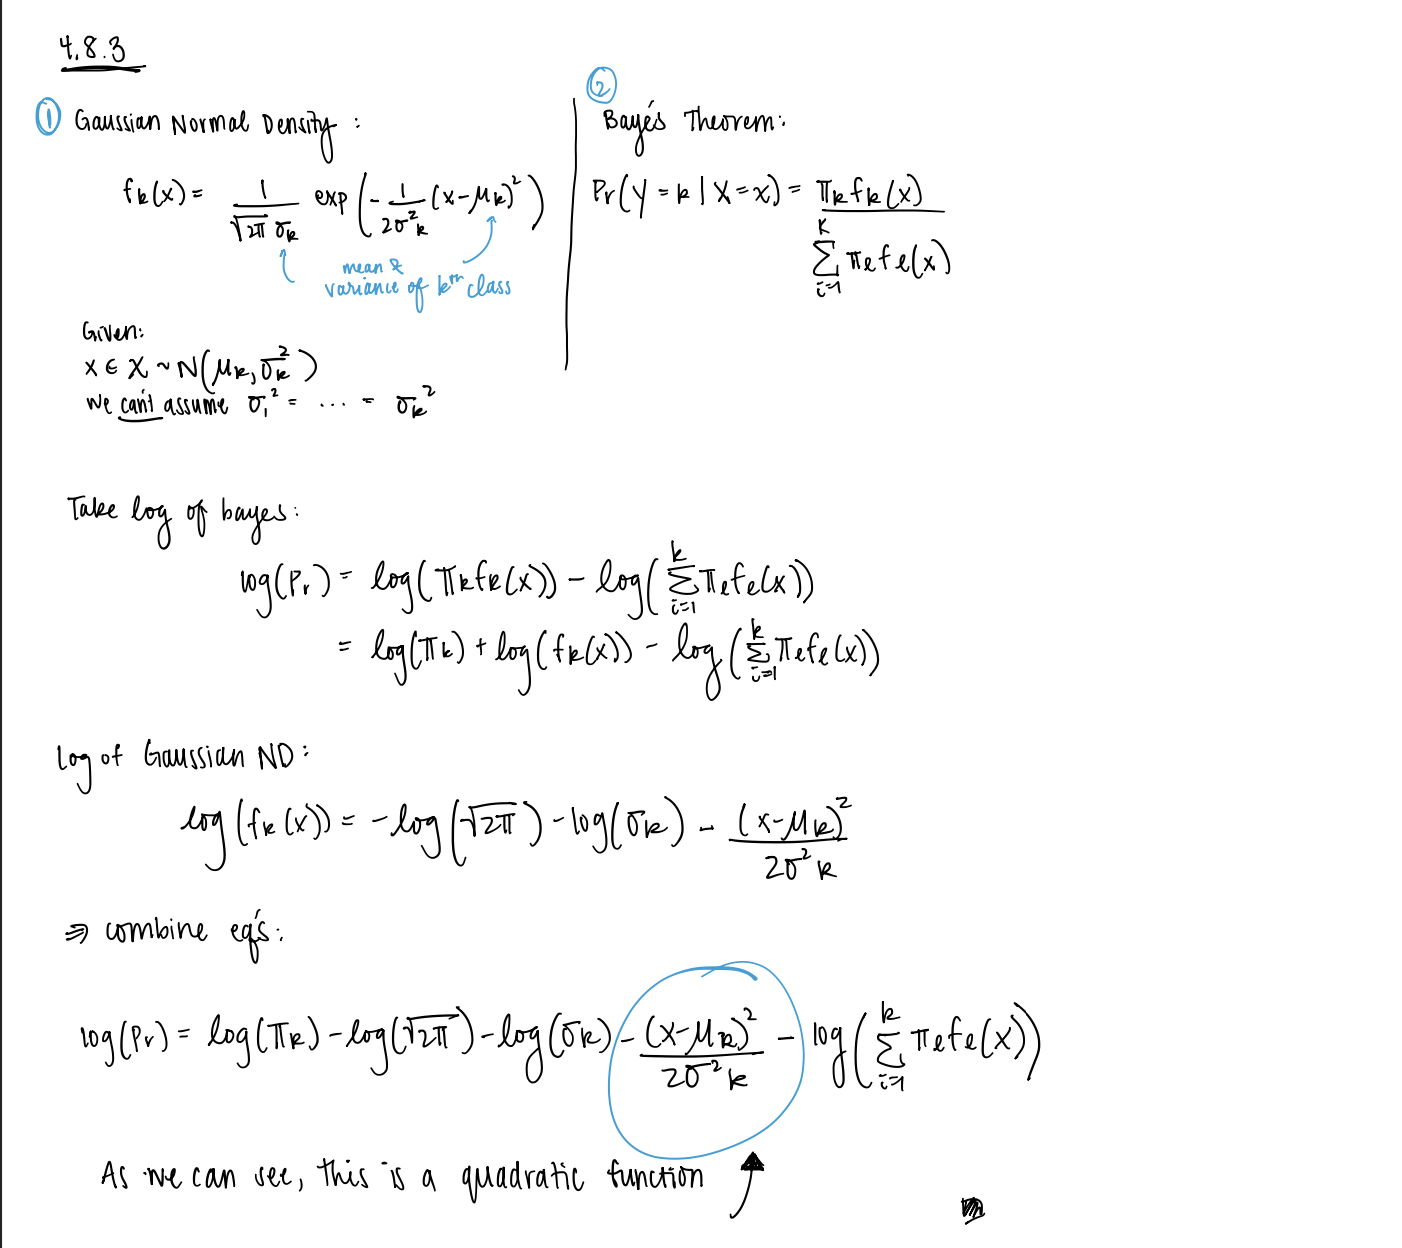

# ISLR 4.8.7

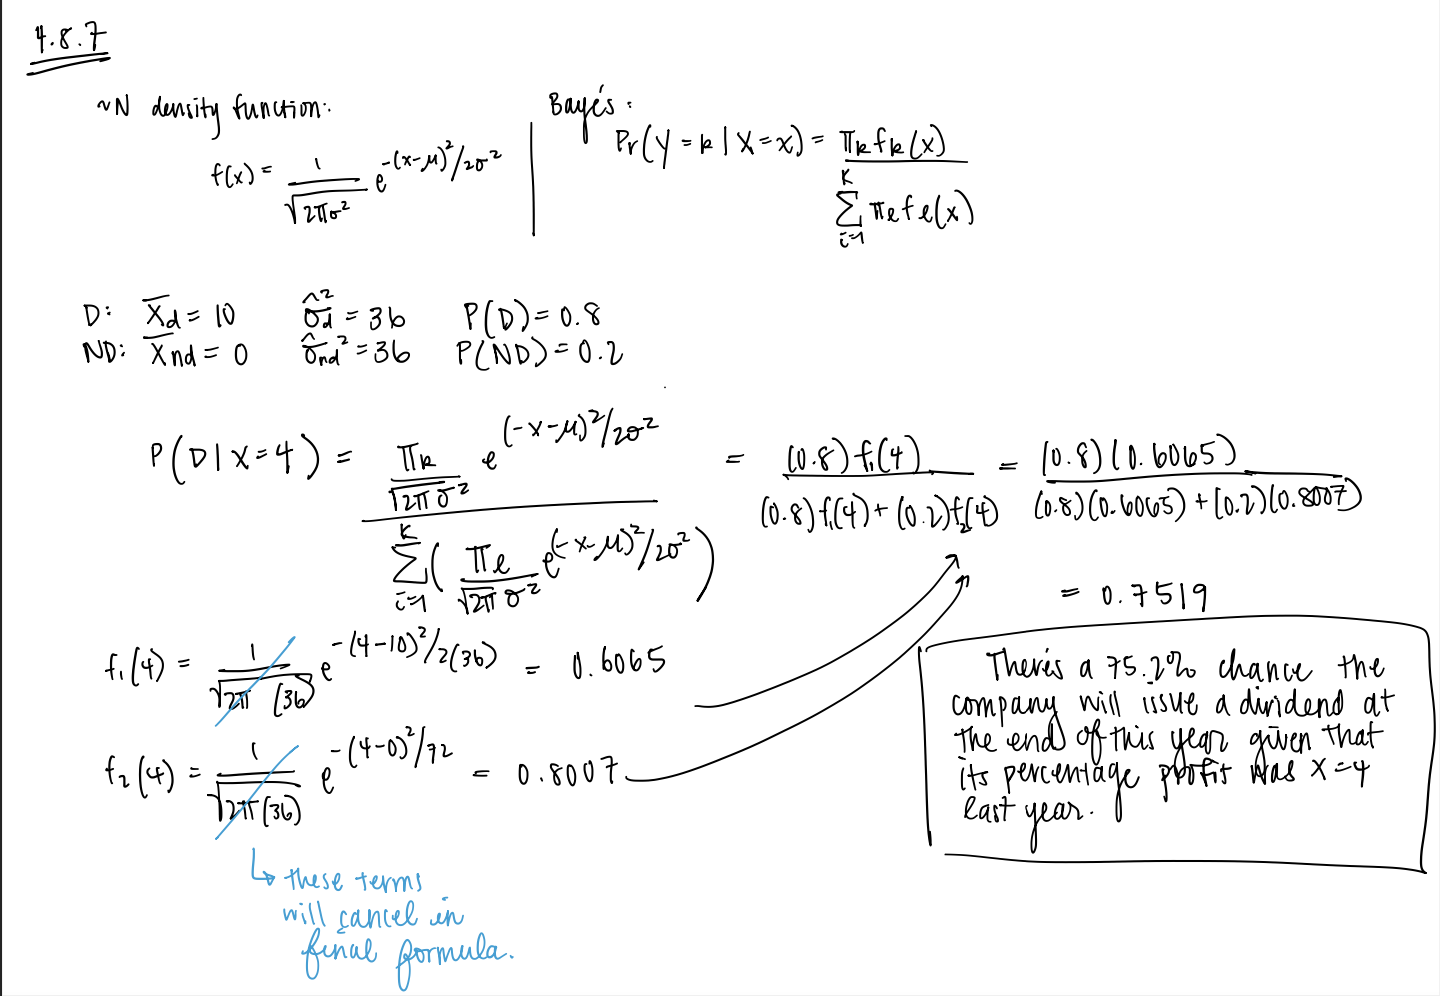